In [1]:
import pandas as pd
import seaborn as sb

In [3]:
at = pd.read_csv("C:/Users/Shree/Downloads/Admission_Predict.csv")

In [5]:
at.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
at.shape

(400, 9)

In [8]:
at.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
from sklearn.preprocessing import Binarizer
bi = Binarizer(threshold=0.75)
at['Chance of Admit '] = bi.fit_transform(at[['Chance of Admit ']])

In [13]:
at.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [14]:
x = at.drop('Chance of Admit ',axis = 1)
y = at['Chance of Admit ']

In [15]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


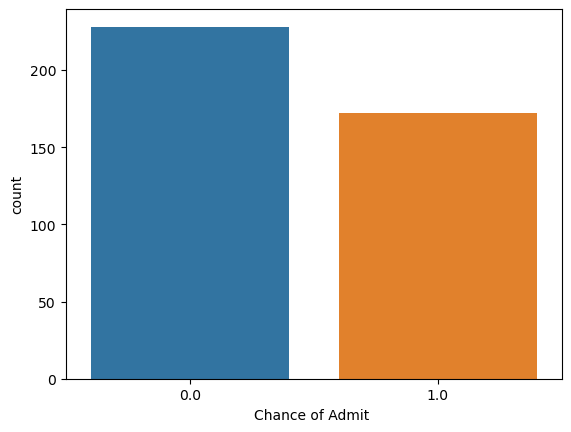

In [17]:
sb.countplot(x = y);

In [18]:
y.value_counts()

0.0    228
1.0    172
Name: Chance of Admit , dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.25)

In [20]:
x_test.shape

(100, 8)

In [21]:
x_train.shape

(300, 8)

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)

In [24]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
y_pred = classifier.predict(x_test)

In [27]:
result = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred
})

In [28]:
result

,actual,predicted
132,0.0,0.0
309,0.0,0.0
341,1.0,1.0
196,0.0,0.0
246,0.0,1.0
...,...,...
146,0.0,0.0
135,1.0,1.0
390,0.0,0.0
264,0.0,0.0


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

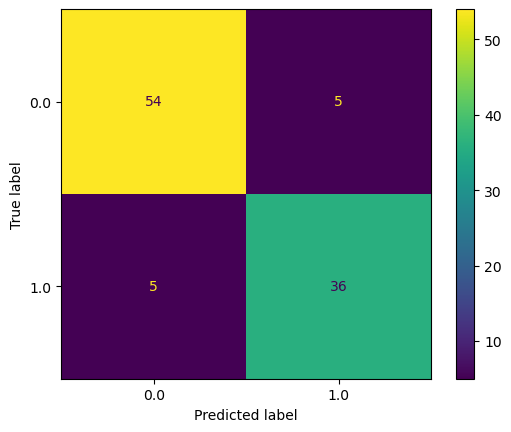

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        59
         1.0       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [32]:
from sklearn.tree import plot_tree

In [35]:
import matplotlib.pyplot as plt

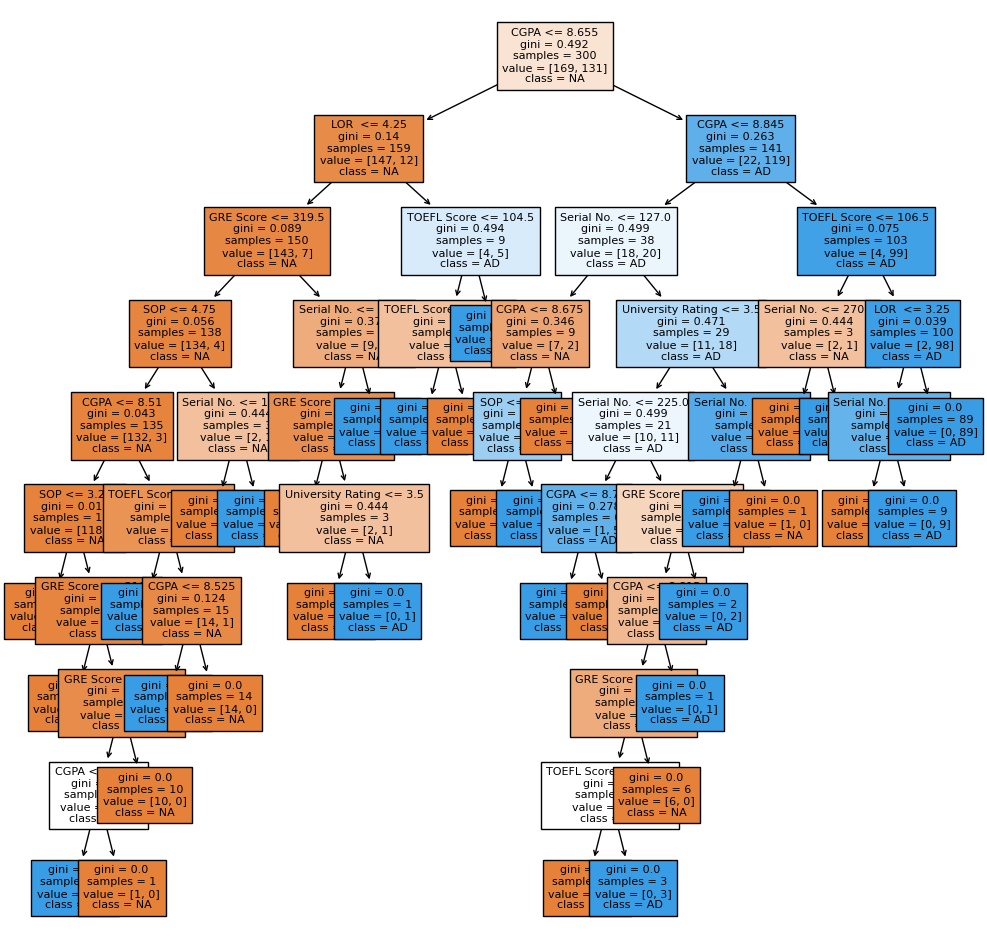

In [40]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize = 8,filled = True,feature_names = x.columns,class_names = ['NA','AD']);